                                                           Notebook created by Dragos Gruia and Valentina Giunchiglia

# Introduction to Summary Statistics and Hypothesis Testing in Python

In this section, we will take you through some of the main concepts in statistics. This tutorial should only be taken after the student has completed the theoretical part of the course, as here we will focus on applying those concepts using Python.

Before analysing any data, it's important to distinguish between the different types of variables that you might come across in your projects.

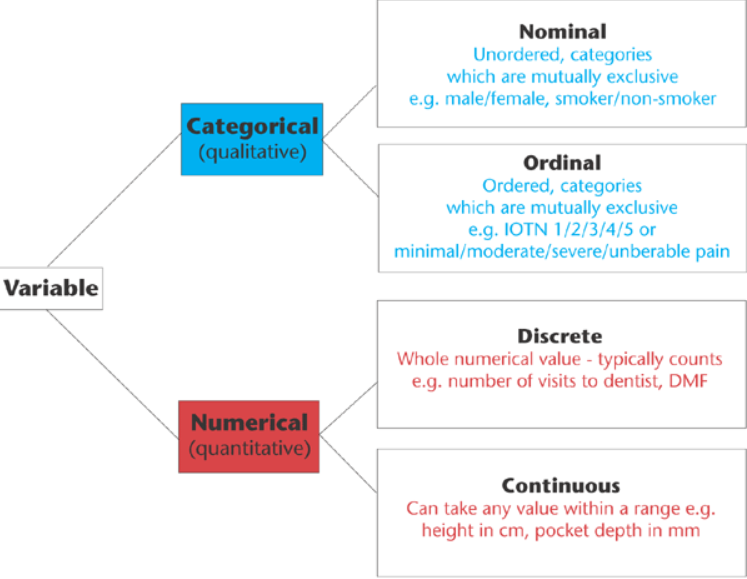

source: https://www.graphpad.com/

Generally speaking, we can split variables into two types: numerical or categorical. It is important to consider these distinctions before we analyse our data, as specific statistical tests often do not work on all variable types. In fact, some of the statistical tests assume that you have a certain type of data, so if your data does not meet those assumptions, the results of the statistical tests will not be accurate.

Thus, one of the first steps in your data analysis should be to look at your variable types and think what analysis would be most appropiate for them. Thankfully Python makes it very easy for us to do this. But first, let's load a dataset. Today's dataset includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. Let's see what we can learn about these Pokemon by using statistics!

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import numpy as np
import os

In [2]:
path = os.getcwd() # this gives us the current working directory
path = path + '/Data/Pokemon.csv'
df = pd.read_csv(path) #Loads our data in a dataframe



Now that the data is loaded, we can easily inspect our variables using `head()` and `dtypes`, as you have learnt already in the previous lecture. Note that `dtypes` is not a function because pandas dataframe contain built in information of what variable type, so you just need to access that information.

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Below you can find more information about your data:

- \#: ID for each pokemon <br />
- Name: Name of each pokemon (e.g. Pikachu) <br />
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks (e.g. Fire, Ghost, Fairy) <br />
- Type 2: Some pokemon are dual type and have 2 (e.g. Dragon-Flying) <br /> 
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is <br />
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting <br />
- Attack: the base modifier for normal attacks (eg. Scratch, Punch) <br />
- Defense: the base damage resistance against normal attacks <br />
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam) <br />
- SP Def: the base damage resistance against special attacks <br />
- Speed: determines which pokemon attacks first each round <br />
- Generation: Generations are used in the Pokémon to denote the chronological divisions of Pokémon canon. Each generation usually denotes a new setting, new Pokémon, and new characters. <br />
- Legendary: Whether or not the Pokemon is legendary.

In [4]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Sometimes, when we load our data, the variables get saved as the wrong data type. In those cases, we want a quick and easy way to tell Python to change their data type. This can be done via the `astype()` method, where you need to specify what data type you want for you variable instead.

In [5]:
df['Generation'] = df['Generation'].astype('category') # Here we changed the type of Generation from integer to category
df.dtypes

#                int64
Name            object
Type 1          object
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation    category
Legendary         bool
dtype: object

Now if you print that column, you can see what are all the Generations found in this dataset

In [6]:
df.Generation

0      1
1      1
2      1
3      1
4      1
      ..
795    6
796    6
797    6
798    6
799    6
Name: Generation, Length: 800, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

## Summarising numerical data

The most common methods of summarising numerical data are the `mean()`, `median()` and `mode()`. We might also be interested in measures of variance or standard deviation, which can be computed via `var()` and `std()` respectively. Let's have a look at how we can use these to find out about how powerful the average Pokemon is.

In [7]:
print(df.Total.mean())
print(df.Total.median())
print(df.Total.mode())
print(df.Total.var())
print(df.Total.std())



435.1025
450.0
0    600
Name: Total, dtype: int64
14391.13090738423
119.96303975551899


Note that dataframes have built in methods such as `mean()` which allow us to compute summary variables with ease. However, if you work with other data structures that might not be the case. In those scenarios, you can use the `numpy` module that we showed you earlier. The two are equivalent, so it is up to you which one you prefer to use.

In [8]:

np.mean(df.Total)

435.1025

The above mentioned code gives us some information about all Pokemon. But what if we wanted to know how powerful a Pokemon is based on their Type? Psychic Pokemon are usually known to be stronger than other types.

In [18]:
# CODE HERE

types = df['Type 1'].value_counts()
for x in types.index:
    mean_power = df.loc[df['Type 1'] == x, 'Total'].mean()
    print('Average power for {} Pokemon is {}'.format(x, mean_power))


Average power for Water Pokemon is 430.45535714285717
Average power for Normal Pokemon is 401.68367346938777
Average power for Grass Pokemon is 421.14285714285717
Average power for Bug Pokemon is 378.92753623188406
Average power for Psychic Pokemon is 475.94736842105266
Average power for Fire Pokemon is 458.0769230769231
Average power for Electric Pokemon is 443.40909090909093
Average power for Rock Pokemon is 453.75
Average power for Dragon Pokemon is 550.53125
Average power for Ground Pokemon is 437.5
Average power for Ghost Pokemon is 439.5625
Average power for Dark Pokemon is 445.741935483871
Average power for Poison Pokemon is 399.14285714285717
Average power for Steel Pokemon is 487.7037037037037
Average power for Fighting Pokemon is 416.44444444444446
Average power for Ice Pokemon is 433.4583333333333
Average power for Fairy Pokemon is 413.1764705882353
Average power for Flying Pokemon is 485.0


----------

### Plotting numerical data

### Code here

Before we do any analysis, it's really useful to look at the distribution of our data. Let's use what you learnt in the previous lesson to plot the distribution of speed, and attack via a histogram. You should also plot some box plots and compare the two; check if one plot provides you with more information than the other. Try to add a title and x and y labels as well to make the plot look better.

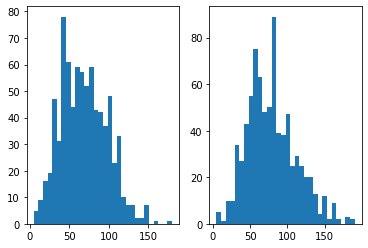

In [22]:
## CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
_ = plt.hist(df["Speed"], bins = 30)
plt.subplot(1,2,2)
_ = plt.hist(df["Attack"], bins = 30)



---------

## Summarising Categorical Data

With non-numerical data, widely used measures of mean and standard deviation do not work. Instead, we use measures of frequency or spread (e.g. percentiles and range) depending on whether our categorical data can be ordered or not. Median can also be used in categorical data, given that the data can be ordered, otherwise it won't be meaningful.

Frequencies can be calculated by counting the number of occurences. One way to do that in Python is via the `value_counts()` method, that we mentioned in the previous lecture.

In [ ]:
df['Legendary'].value_counts()

Can you figure out how to plot the total power of the legendary Pokemon?

Sometimes the overall count can be hard to interpret or misleasing, so we we can change the representation of the data to a proportion.

In [ ]:
df['Legendary'].value_counts(normalize = True)

Sometimes, when we want to run specific statistics, we want our categorical data to be binarised into column containing zero or one, where the latter only occurs when a specific category is found. This is called hot-encode and can be done via the `get_dummies()` method in pandas, by simply specifying which columns you want to binarise.

In [ ]:
df = pd.get_dummies(data = df, columns= ['Type 1'])
df

Now, we can look at the frequency of a Pokemon type in a similar way.

In [ ]:
df['Type 1_Psychic'].value_counts()


In [ ]:
df['Type 1_Psychic'].value_counts(normalize=True)

------------

### Plotting categorical data

### Code here

Let's also visualise our categorical data. Let's use what you learnt in the previous lesson to plot the number of Pokemon in each generation, via a bar chart and a pie chart. Which one do you think is more useful to visualise this data and why?

<BarContainer object of 6 artists>

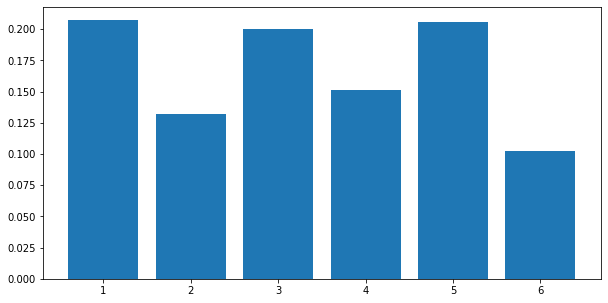

In [24]:
## CODE HERE

df.Generation.value_counts()

count = pd.DataFrame(df["Generation"].value_counts(normalize=True))
plt.figure(figsize = (10, 5))
plt.bar(count.index, count["Generation"])


## Hypothesis testing and statistical tests

In this section we will introduce some of the most widely used statistical tests. These should have already been covered (theoretically) in the stats materials, so in this section we will show you how to use Python to calculate those statistics.

One thing we might want to examine is: are legendary Pokemon more powerful than regular Pokemon? But before we decide to run any statistics we need to check if our data is normally distributed

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df.Total)

On a first glance, the data looks somewhat normally distributed. So, one might be tempted to assume that is the case and start the analysis. A more robust way to make this decision is to use a test for normality. One of the most common ones is the `Shapiro test`. If the test has a p-value lower than 0.05 it means the distribution is not normal.  

In [ ]:
stats.shapiro(df.Total)

We can see that based on `Shapiro`, the sample is not normally distributed. One thing we can do is apply a rank-inverse transformation on our data to improve its normality. Feel free to look up how the rank inverse transformation works but this is not essential for the current workshop

In [ ]:
import rank_inv
plt.hist(rank_inv.rank_INT(df.Total))

Please note that rank_inv is a function we created ourselves, so you can also import functions that you created in python and then use them. Moreover, we can now see that the sample looks a lot closer to normal distribution. Let's run the shapiro test on it again and check.

In [ ]:
stats.shapiro(rank_inv.rank_INT(df.Total))

Perfect, the sample is now normally distributed. Let's replace the raw values from our dataset with the new values we obtained from the rank inverse transformation

In [ ]:
df.Total = rank_inv.rank_INT(df.Total)

Another advantange to the rank inverse transformation is that it is able to deal with outliers quite well. Due to the way the data is transformed, the effect of the outliers will be reduced, so you don't need to apply both rank inverse and remove outliers before you perform your analysis.

Now that we know our sample is normally distributed, we can run some interesting statistics on it. First we might be interested to see if legendary Pokemon are stronger on average than regular pokemon. We can do this via a two-sample t-test.

In [ ]:
legendary = df.Total[df.Legendary == True]
not_legendary = df.Total[df.Legendary == False]

tstat, pval = stats.ttest_ind(legendary, not_legendary)
print(pval)
print(tstat)

print(np.mean(legendary))
print(np.mean(not_legendary))

As expected we can see there is a statistically significant difference between legendary pokemon and regular Pokemon, when it comes to overall strength. By inspecting the mean of each group, we can tell the direction of this difference. We can see that legendary pokemon are about 50% stronger on average than regular Pokemon!

But what if we did not want to normalize our data using rank inverse transformation? The alternative to doing that is using non-parametric tests which do not require our data to be normally distributed.

One of the most flexible and robust non-parametric tests is called a permutation test. Due to the nature of the test, it can be pretty much adapted to any analysis, we can even run permutations on regressions and on ANOVAs! Permutations should have been explained in the theoretical part of the statistical course, however I recommend going through this resource if you don't think you understand how it works. We find it very nice and interactive https://patrickvossler18.github.io/buad_312_files/permutation_test/index.html

For demonstration purposes, below is how you run a permutation analysis in Python, using 10000 permutations. However, as your data is already normalized, using this would not be necessary.

In [ ]:
from mlxtend.evaluate import permutation_test
p_value = permutation_test(legendary, not_legendary, method='approximate', num_rounds=10000,  seed=0)
print(p_value)

## Correlation analysis

Correlation can be easily done in Python. One question we might ask is, how does a Pokemon's overall Health relate to their attack power? Let's apply the same process as before to check whether the data is normally distributed then update our variables.


In [ ]:
stats.shapiro(df.HP)

In [ ]:
stats.shapiro(df.Attack)

In [ ]:
df.HP = rank_inv.rank_INT(df.HP)
df.Attack = rank_inv.rank_INT(df.Attack)
stats.shapiro(df.Attack)
stats.shapiro(df.HP)

In [ ]:
rvalue, pvalue = stats.pearsonr(df.HP, df.Attack)
print(rvalue)
print(pvalue)
plt.scatter(df.HP, df.Attack)


The data shows that the higher the attack of a Pokemon, the higher their HP seems to be. But since the correlation is only moderate in effect, this pattern will not apply to all Pokemon. We can see that there are some Pokemon with very high attack but low HP.

Since our data is normally distributed, we can easily use a Pearson correlation, however if that was not the case, we would have to use a non-parametric alternative. The most common one is the Spearman Correlation. We show how to run it below for demonstration purposes.

In [ ]:
rvalue, pvalue = stats.spearmanr(df.HP, df.Attack)

Try to run this on the data before we rank inverse transformed it. Are the results different?

Now, let's say we want to run 10 more other correlations to look at associations between different stats. It is important to consider that when we do that, we increase our False Positive rate. In other words, we increase the chances of finding a significant p-value by chance. <br />

To account for this, a commonly used method is called the Bonferroni correction. This works by taking your p-threshold (e.g. 0.05) and dividing it by the number of tests that you are planning to run (in our case, 10 correlation analyses). <br />

After we divide the p-threshold by the number of tests, we obtain a new p-value <br />

In [ ]:
new_p_value = 0.05 / 10
print(new_p_value)

Once the new value has been computed, we now use this as our significance threshold in all our analyses. So, unless our correlation analyses have a p-value lower than 0.005 (in this case), we would not consider them statistically significant correlations.

One easy way to visualise loads of different correlations between variables is using the `.corr` method that dataframes have

In [ ]:
df.corr(method ='spearman')

As you can see this method plots the correlations between all of your variables. Some correlations make more sense than others, though. For example we would not expect a Pokemon strength to be linked to their ID or their Name

## Linear Regression

In this section, we will use a linear regression to predict a Pokemon's overall strength, by using their HP and Attack, while also controlling for the generation of the Pokemon.

In [25]:

model = sm.OLS.from_formula('Total ~ Attack + HP + Generation', data = df) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          3.11e-181
Time:                        16:16:14   Log-Likelihood:                -4531.7
No. Observations:                 800   AIC:                             9079.
Df Residuals:                     792   BIC:                             9117.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         146.7978      9.128     

From this we can look at a few summary statistics. We can see that the Attack and HP are statistically significant at P<.0.05, and their coeff are positive. This means that the higher the Attack and HP of a Pokemon the higher their overall strength, which makes sense. <br /> <br />
By looking at the Generation variable, we can also see that Python automatically binarises this variable. In addition all generations are compared to Generation 1 (how do I know that? Generation 1 is the only one not shown in the table, so it must mean that all the other generations are compared to it). We can see that the generation of the Pokemon does not have an effect on the results most of the times, with the exception of Generation 5. Here, given the negative coefficient, the results indicate that generation 5 Pokemon (as opposed to generation 1) have lower overall strength. This may be because Generation 5 Pokemon are weaker on average than Generation 1. <br /> <br />
Another useful statistic is the R-squared. This tell us how much of the variation in Pokemon strength is explained by our independent variables (Pokemon Attack, HP and Generation). Higher R-values are generally better; in this scenario our model is able to explain 67.4% of the variation in Pokemon strength, only using 2 out of the 6 variables provided by the dataset.

What happens if you add measures of Speed and Defense as independent variables to the model?

In [26]:
##CODE HERE


model = sm.OLS.from_formula('Total ~ Attack + HP + Generation + Speed + Defense', data = df) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     706.3
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:18:06   Log-Likelihood:                -4083.4
No. Observations:                 800   AIC:                             8187.
Df Residuals:                     790   BIC:                             8234.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.3346      6.186     

## One-way Anova

From our previous analyses we found out that some Pokemon generations may vary in strength. Let's look at this in more detail using an ANOVA. Here we will perform a one-way anova to see if there is significant variation in Pokemon total strength across 6 different generations.

First we split our data in 6 variables, each containing the total scores for each generation. Then, we input these in our ANOVA

In [27]:
total_gen1 = df.Total[df.Generation == 1]
total_gen2 = df.Total[df.Generation == 2]
total_gen3 = df.Total[df.Generation == 3]
total_gen4 = df.Total[df.Generation == 4]
total_gen5 = df.Total[df.Generation == 5]
total_gen6 = df.Total[df.Generation == 6]

In [28]:
fstat, pval = stats.f_oneway(total_gen1, total_gen2, total_gen3, total_gen4, total_gen5, total_gen6)
print(fstat,pval)

1.5468886194072942 0.1728665457411497


The results show that our p-value is non-significant at p>0.05. Normally, under these circumstances, we would not continue with any follow-up tests. However, for demonstration purposes, let's say we had a strong hypothesis that generation 1 and 6 would be different, where generation Pokemon are a lot weaker on average. To test this hypothesis, we can run a Tukey's test.

In [29]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['Total'], groups=df['Generation'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5302 0.9928 -51.0652 34.0047  False
     1      3   9.4117 0.9808 -28.4904 47.3139  False
     1      4  32.2033 0.2164   -8.691 73.0976  False
     1      5   8.1746 0.9895 -29.4339 45.7832  False
     1      6   9.5648 0.9916  -36.613 55.7426  False
     2      3   17.942 0.8387 -24.9027 60.7866  False
     2      4  40.7335 0.1094  -4.7795 86.2466  False
     2      5  16.7049 0.8729 -25.8803   59.29  False
     2      6   18.095 0.9087 -32.2188 68.4089  False
     3      4  22.7915 0.6123 -18.4248 64.0078  False
     3      5  -1.2371    1.0 -39.1956 36.7213  False
     3      6    0.153    1.0 -46.3102 46.6163  False
     4      5 -24.0287 0.5479 -64.9752 16.9179  False
     4      6 -22.6385 0.7731 -71.5732 26.2962  False
     5      6   1.3902    1.0 -44.8339 47.6142  False
----------------------------

Here we ran the test on all possible comparisons, just so you can see that there is essentially no effect of Pokemon Generation on the overall strength of the Pokemon. You can also run Tukey's on only one comparison that is of interest to you.

You can also plot this to visualise it better. When a horizontal line crosses the vertical dotten line, it means that the comparison is not statistically significant.

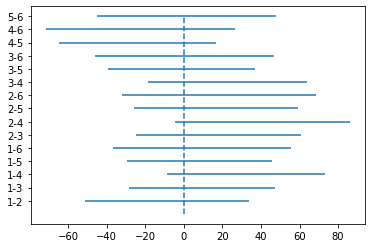

In [30]:
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

We also have a lot of information on the Pokemon Type (e.g. Fire, Psychic, Ghost). Try to run your own ANOVA analysis on that data to examine whether certain Pokemon types are stronger than others on average.

HINT: make sure you change the datatype of the `Type 1` variable to category before you do any analyses on it. Certain Python functions only work on certain types of data, so it's important to make sure the format of your data is compatible with them

In [32]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

4.63876748166055 2.077215448842098e-09


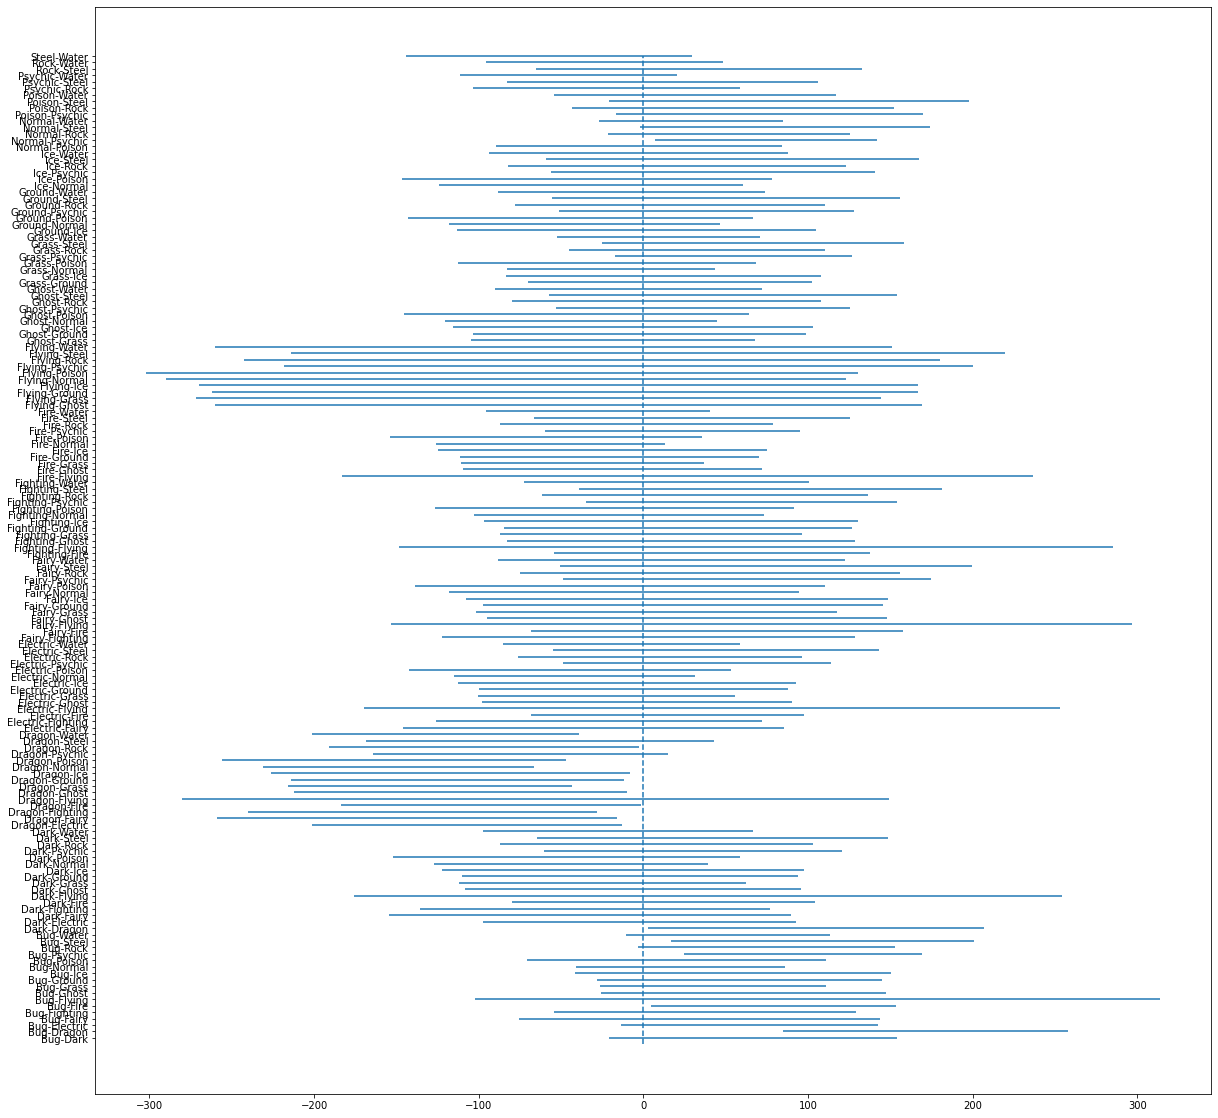

In [37]:
#CODE HERE

total_type1_1 = df.Total[df["Type 1"] == 'Water']
total_type1_2 = df.Total[df["Type 1"] == 'Normal']
total_type1_3 = df.Total[df["Type 1"] == 'Grass']
total_type1_4 = df.Total[df["Type 1"] == 'Bug']
total_type1_5 = df.Total[df["Type 1"] == 'Psychic']
total_type1_6 = df.Total[df["Type 1"] == 'Fire']
total_type1_7 = df.Total[df["Type 1"] == 'Electric']
total_type1_8 = df.Total[df["Type 1"] == 'Rock']
total_type1_9 = df.Total[df["Type 1"] == 'Dragon']
total_type1_10 = df.Total[df["Type 1"] == 'Ground']
total_type1_11 = df.Total[df["Type 1"] == 'Ghost']
total_type1_12 = df.Total[df["Type 1"] == 'Dark']
total_type1_13 = df.Total[df["Type 1"] == 'Poison']
total_type1_14 = df.Total[df["Type 1"] == 'Steel']
total_type1_15 = df.Total[df["Type 1"] == 'Fighting']
total_type1_16 = df.Total[df["Type 1"] == 'Ice']
total_type1_17 = df.Total[df["Type 1"] == 'Fairy']
total_type1_18 = df.Total[df["Type 1"] == 'Flying']


fstat, pval = stats.f_oneway(total_type1_1, total_type1_2, total_type1_3, total_type1_4,
                             total_type1_5, total_type1_6, total_type1_7, total_type1_8, total_type1_9,
                             total_type1_10, total_type1_11,total_type1_12, total_type1_13,total_type1_14,
                             total_type1_15,total_type1_16,total_type1_17,total_type1_18)
print(fstat,pval)


tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['Total'], groups=df['Type 1'], alpha=0.05)

rows = tukey.summary().data[1:]
plt.figure(figsize = (30, 20))
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()





There are many more statistics that we did not cover in this tutorial such as the chi square, and there are also more advanced features for the statistics we presented (like the 2-way and 3-way ANOVA). You will learn more about these as the course progresses!